In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
from keras.applications.vgg16 import VGG16

model=VGG16(weights='imagenet')

In [4]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path='/home/ai-ee/Downloads/creative_common_elephant.jpg'
img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [5]:
preds=model.predict(x)
print('Predicted:',decode_predictions(preds,top=3)[0])

40960/35363 [==================================] - 1s 27us/step
Predicted: [('n02504458', 'African_elephant', 0.9094213), ('n01871265', 'tusker', 0.08618258), ('n02504013', 'Indian_elephant', 0.004354576)]


In [7]:
np.argmax(preds[0])

386

In [25]:
african_e661ephant_output=model.output[:,386]
print(african_e661ephant_output)

Tensor("strided_slice_2:0", shape=(?,), dtype=float32)


In [26]:
last_conv_layer=model.get_layer('block5_conv3')

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [11]:
from keras import backend as K

In [12]:
grads=K.gradients(african_e661ephant_output,last_conv_layer.output)[0]

In [13]:
pooled_grads=K.mean(grads,axis=(0,1,2))

In [14]:
iterate=K.function([model.input],[pooled_grads,last_conv_layer.output[0]])

In [15]:
pooled_grads_value,conv_layer_output_value=iterate([x])

In [16]:
for i in range(512):
    conv_layer_output_value[:,:,i]*=pooled_grads_value[i]

In [17]:
heatmap=np.mean(conv_layer_output_value,axis=-1)

In [18]:
heatmap=np.maximum(heatmap,0)

In [19]:
heatmap/=np.max(heatmap)

In [23]:
import matplotlib.pyplot as plt

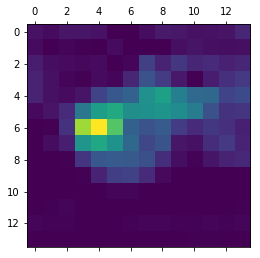

In [24]:
plt.matshow(heatmap)

In [29]:
### embedding into the picture
import cv2
img=cv2.imread(img_path)

In [30]:
heatmap=cv2.resize(heatmap,(img.shape[1],img.shape[0]))

In [31]:
heatmap=np.uint8(255*heatmap)

In [32]:
heatmap=cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)

In [33]:
superimposed_img=heatmap*0.4+img

In [34]:
cv2.imwrite('/home/ai-ee/Downloads/creative_common_elephant_2.jpg',superimposed_img)

True